In [3]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

df=pd.read_csv("data/titanic.csv",index_col="PassengerId")

print(df.shape)
df.head()

df=df.drop(['Name','Ticket','Cabin'],axis=1)
df

#전처리
df["Sex"]=df.Sex.map({"female":0, "male":1})
df

#결측치 확인
df.isnull().sum()

df.Age.fillna(df.Age.median(), inplace=True)
df.dropna(subset=['Embarked'], inplace=True)
df
#age 중간값으로 결측치 채우기
#embarked 결측치는 삭제

df.isnull().sum()

df=pd.get_dummies(df)

df

#x는6개(컬럼=문제) y는 2개(생존여부=답)
X = np.array(df.iloc[:,1:])
y = np.array(df["Survived"])
X

y

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

print("X_train 크기:", X_train.shape)
print("y_train 크기:", y_train.shape)
print("X_test 크기:", X_test.shape)
print("y_test 크기:", y_test.shape)

(891, 11)
X_train 크기: (622, 9)
y_train 크기: (622,)
X_test 크기: (267, 9)
y_test 크기: (267,)


In [7]:
tree=DecisionTreeClassifier(random_state=0, max_depth = 3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [9]:
from sklearn.ensemble import RandomForestClassifier

RF= RandomForestClassifier(n_estimators=100, random_state=0) #100그루
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [10]:
temp_y_pred_rf=RF.predict(X_test)
temp_y_pred_rf

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1], dtype=int64)

In [13]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score

#정확도계산
temp_acc= accuracy_score(y_test, temp_y_pred_rf)

print(temp_acc)

0.8127340823970037


In [14]:
scores = []
for i in range(10,500,5):
    RF=RandomForestClassifier(n_estimators=i, random_state=0)
    RF.fit(X_train,y_train)
    
    att= RF.predict(X_test)
    acc = accuracy_score(y_test,att)
    scores.append(acc)
    
    print('>%d, acc: %.3f'% (i, acc))

>10, acc: 0.775
>15, acc: 0.790
>20, acc: 0.798
>25, acc: 0.794
>30, acc: 0.787
>35, acc: 0.787
>40, acc: 0.794
>45, acc: 0.787
>50, acc: 0.794
>55, acc: 0.794
>60, acc: 0.794
>65, acc: 0.801
>70, acc: 0.801
>75, acc: 0.798
>80, acc: 0.801
>85, acc: 0.809
>90, acc: 0.809
>95, acc: 0.809
>100, acc: 0.813
>105, acc: 0.809
>110, acc: 0.809
>115, acc: 0.805
>120, acc: 0.805
>125, acc: 0.805
>130, acc: 0.805
>135, acc: 0.801
>140, acc: 0.801
>145, acc: 0.794
>150, acc: 0.801
>155, acc: 0.801
>160, acc: 0.798
>165, acc: 0.801
>170, acc: 0.801
>175, acc: 0.801
>180, acc: 0.801
>185, acc: 0.801
>190, acc: 0.798
>195, acc: 0.801
>200, acc: 0.801
>205, acc: 0.801
>210, acc: 0.801
>215, acc: 0.798
>220, acc: 0.801
>225, acc: 0.801
>230, acc: 0.805
>235, acc: 0.805
>240, acc: 0.805
>245, acc: 0.805
>250, acc: 0.805
>255, acc: 0.805
>260, acc: 0.805
>265, acc: 0.805
>270, acc: 0.805
>275, acc: 0.801
>280, acc: 0.801
>285, acc: 0.805
>290, acc: 0.805
>295, acc: 0.805
>300, acc: 0.805
>305, acc: 0.80

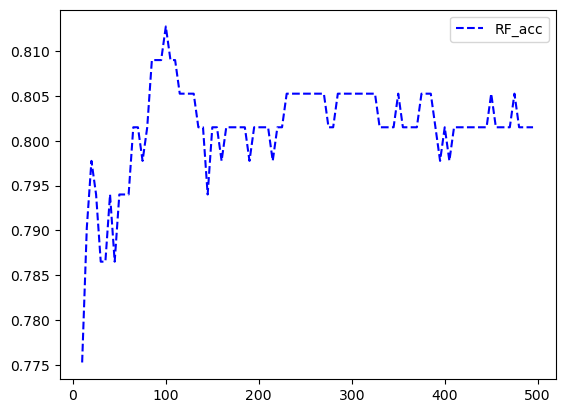

In [15]:
import matplotlib.pyplot as plt

plt.plot(range(10,500,5), scores, 'b--', label='RF_acc')
plt.legend()

In [16]:
#n_estmators =300으로 새로 적합
RF=RandomForestClassifier(n_estimators=300, random_state=0)
RF.fit(X_train, y_train)
temp_y_pred_rf = RF.predict(X_test)

In [17]:
#랜덤포레스트 모델성능
print('accuracy :', accuracy_score(y_test, temp_y_pred_rf))
print('precision :', precision_score(y_test, temp_y_pred_rf))
print('recall :', recall_score(y_test, temp_y_pred_rf))
print('f1 :', f1_score(y_test, temp_y_pred_rf))

accuracy : 0.8052434456928839
precision : 0.7959183673469388
recall : 0.7090909090909091
f1 : 0.75


In [18]:
#ROC커브 AUC비교
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, tree.predict_proba(X_test)[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, RF.predict_proba(X_test)[:,1])

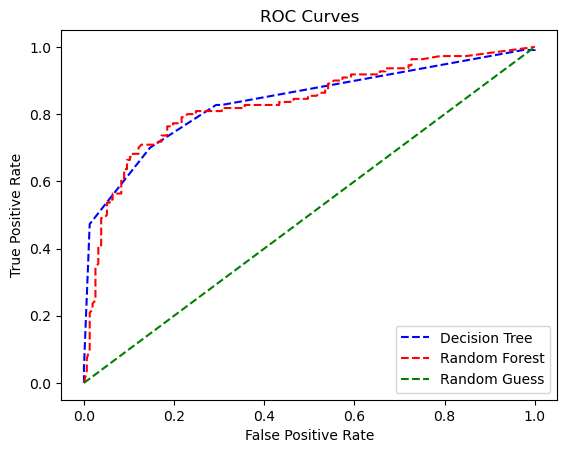

In [19]:
#ROC curve 그래프 그리기
plt.plot(fpr1, tpr1, 'b--', label="Decision Tree")
plt.plot(fpr2, tpr2, 'r--', label="Random Forest")
plt.plot([0,1],[0,1],'g--',label="Random Guess")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

In [20]:
roc_auc_DT= metrics.auc(fpr1,tpr1)
roc_auc_RF= metrics.auc(fpr2,tpr2)

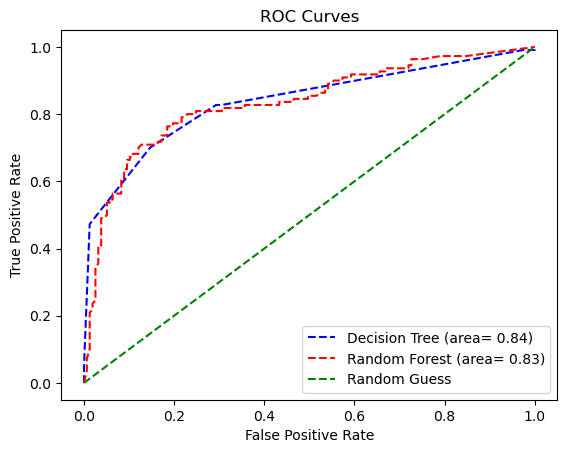

In [23]:
#연혁에 AUC값 출력
plt.plot(fpr1, tpr1, 'b--', label='Decision Tree (area= %0.2f)' %roc_auc_DT)
plt.plot(fpr2, tpr2, 'r--', label='Random Forest (area= %0.2f)' %roc_auc_RF)
plt.plot([0,1],[0,1],'g--',label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

In [12]:
#정확도 계산
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

temp_acc = accuracy_score(y_test, temp_y_pred)
#y_test와 temp_y_pred로 예측한 값을 적용하여 temp_acc를 추출함

print('정확도: ', format(temp_acc))

NameError: name 'temp_y_pred' is not defined

In [30]:
#모델성능평가
temp_y_pred_ = tree.predict(X_test)
#training 값을 X_test에서 넣음
print('예측값\n', temp_y_pred)
print('실제값\n', y_test)

예측값
 [1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1
 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0
 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1 0 0 1 0 1]
실제값
 [0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1
 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1
 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1

In [32]:
#오차행렬(Confusion Matrix)
print(confusion_matrix(y_test, temp_y_pred))

[[131  26]
 [ 34  76]]


In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('accuracy :', accuracy_score(y_test, temp_y_pred))
print('precision :', precision_score(y_test, temp_y_pred))
print('recall :', recall_score(y_test, temp_y_pred))
print('f1 :', f1_score(y_test, temp_y_pred))

accuracy : 0.7752808988764045
precision : 0.7450980392156863
recall : 0.6909090909090909
f1 : 0.7169811320754716


In [34]:
#모델 성능
print(classification_report(y_test,tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       157
           1       0.75      0.69      0.72       110

    accuracy                           0.78       267
   macro avg       0.77      0.76      0.77       267
weighted avg       0.77      0.78      0.77       267



In [36]:
#실습해보자
tree.predict([[1,1,35,2,2,10,1,0,0]])

array([0], dtype=int64)

In [37]:
#변수중요도
tree.feature_importances_

array([0.11235791, 0.3194374 , 0.2314652 , 0.06171288, 0.03506526,
       0.21051196, 0.00334388, 0.01868497, 0.00742054])

In [38]:
pd.DataFrame(tree.feature_importances_.reshape((1,-1)), index=['feature_importance'])

,0,1,2,3,4,5,6,7,8
feature_importance,0.112358,0.319437,0.231465,0.061713,0.035065,0.210512,0.003344,0.018685,0.007421


def predict_Survival():
    Pclass=input("객실등급: ")
    Sex=input("성별(남1, 여0): ")
    Age=input("나이: ")
    SibSp=input("형제자매와 배우자수: ")
    Parch=input("부모자녀수: ")
    Fare=input("운임: ")
    tree.predict([[Pclass,Sex,Age,Sibsp,Parch,Fare]])
    print("객실등급: ",Pclass)
    print("성별(남1, 여0): ", Sex)
    print("나이: ", Age)
    print("형제자매와 배우자수: ", Sibsp)
    print("부모자녀수: ", Parch)
    print("운임: ", Fare)

#단톡에 공유된 도전코드
def predict_Survial():
    pclass = int(input("객실등급: "))
    sex = int(input("성별(1:남 / 0:여): "))
    age = int(input("나이:"))
    sibsp = int(input("형제자매와 배우자수: "))
    parch = int(input("부모자녀수: "))
    fare = int(input("운임: "))
    pred = tree.predict([[pclass, sex, age, sibsp, parch, fare]])  
    pred = "사망" if pred == 0 else "생존"
    
    print("생존여부 분류:", pred)

In [17]:
#과적합과 가지치기
train_scores, test_scores = list(), list()
#train_score와 test_score의 정확도 저장 장소
#train_score는 훈련데이터에 특화될수록 증가
#test_score는 테스트데이터에 일반화될수록 증가

In [18]:
#의사결정나무 모델의 깊이 조절(1~19)
for i in range(1,20):
    DT1=DecisionTreeClassifier(max_depth=i)
    #깊이를 증가시키면서 ~나무 모델 적합
    DT1.fit(X_train, y_train)
    
    #traing dataset 정확도 평가
    train_att= DT1.predict(X_train)
    train_acc= accuracy_score(y_train, train_att)
    train_scores.append(train_acc)
    
    #test dataset 정확도 평가
    test_att= DT1.predict(X_test)
    test_acc= accuracy_score(y_test, test_att)
    test_scores.append(test_acc)
    
    #train 정확도와 test 정확도를 depth개수에 따른 정확도 확인
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.787, test: 0.787
>2, train: 0.791, test: 0.787
>3, train: 0.836, test: 0.821
>4, train: 0.844, test: 0.821
>5, train: 0.859, test: 0.813
>6, train: 0.872, test: 0.795
>7, train: 0.881, test: 0.802
>8, train: 0.905, test: 0.810
>9, train: 0.925, test: 0.817
>10, train: 0.941, test: 0.813
>11, train: 0.960, test: 0.795
>12, train: 0.966, test: 0.810
>13, train: 0.971, test: 0.813
>14, train: 0.976, test: 0.806
>15, train: 0.978, test: 0.795
>16, train: 0.978, test: 0.799
>17, train: 0.979, test: 0.795
>18, train: 0.979, test: 0.802
>19, train: 0.979, test: 0.806


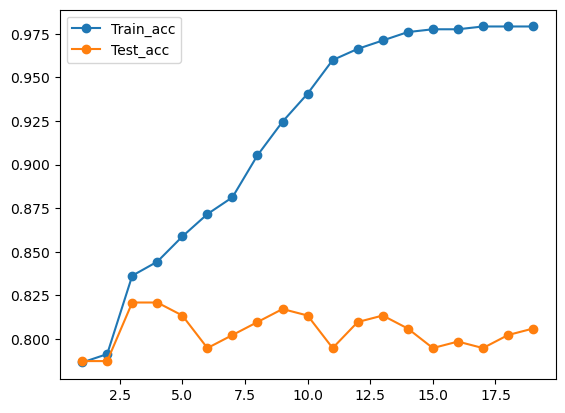

In [19]:
from matplotlib import pyplot

pyplot.plot(range(1,20), train_scores, '-o', label= 'Train_acc')
pyplot.plot(range(1,20), test_scores, '-o', label= 'Test_acc')
pyplot.legend()
pyplot.show()

#최적의 ~나무 깊이는 3 (주황색 제일 높은(오류도 반대니까) 지점)

In [20]:
tree = DecisionTreeClassifier(random_state=0, max_depth=3)
tree.fit(X_train, y_train)
#새로운 최적깊이 값(3) 부여

DecisionTreeClassifier(max_depth=3, random_state=0)

In [21]:
#트리시각화
import graphviz
from sklearn.tree import export_graphviz

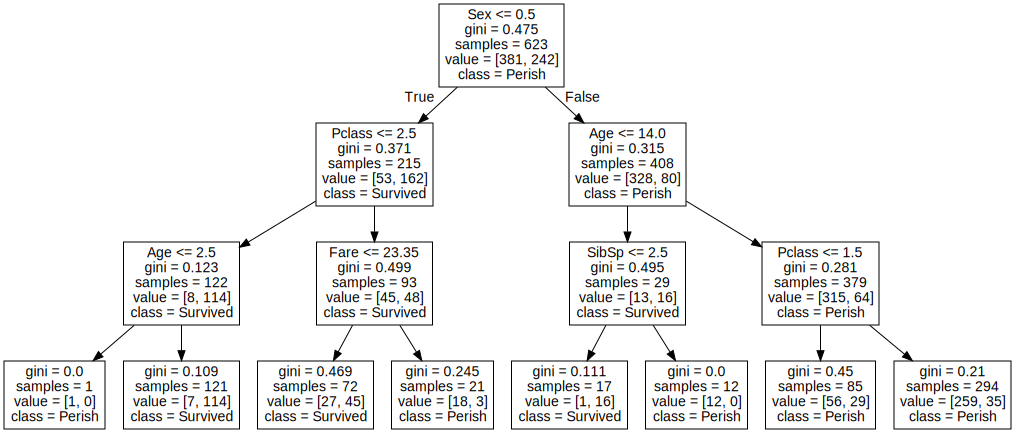

In [22]:
feature_name=['Pclass','Sex','Age','SibSp','Parch','Fare']
tree_graph=export_graphviz(tree, feature_names=feature_name, class_names=["Perish", "Survived"])
graphviz.Source(tree_graph)

In [23]:
dot=graphviz.Source(tree_graph)
dot.format = 'gif'
dot.render(filename='titanic_tree', directory="tree", cleanup=True)

'tree\\titanic_tree.gif'

In [39]:
tree.predict(X_test)
#ROC실습

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1], dtype=int64)

In [41]:
tree.predict_proba(X_test)[:,1]
#0.5보다 크면 생존, 작으면 사망

array([1.        , 0.        , 1.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 0.        , 0.5       , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.     

In [44]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:,1])

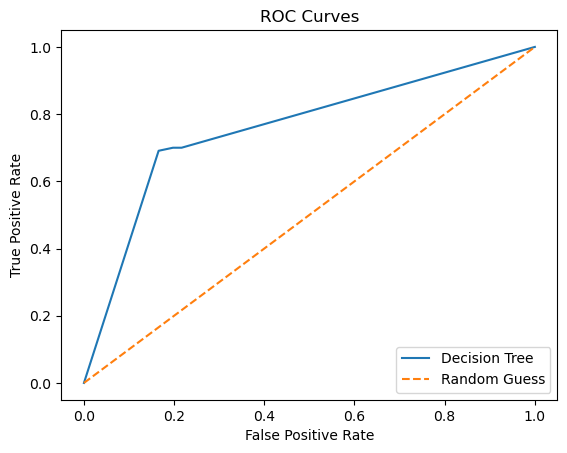

In [45]:
#ROC curve 그래프 그리기
plt.plot(fpr, tpr, '-', ms=2, label="Decision Tree")
plt.plot([0,1],[0,1],'--',label="Random Guess")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

In [47]:
#AUC 계산
from sklearn import metrics
roc_auc=metrics.auc(fpr,tpr)
print('Area Under Curve : %0.2f'% roc_auc)

Area Under Curve : 0.76
